# 1. Introduction

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.1 Context</b></p>
</div>

This is an overview of the evaluation algorithms used in passed competitions from the year 2014 onwards.

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.2 Used code</b></p>
</div>

The code used is adapted from the chapter on The Meta Kaggle dataset in [The Kaggle Book](https://www.kaggle.com/general/320574) by [(Banachewicz & Massaron)](#3.-References).

# 2. Implementation

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>2.1 Libraries</b></p>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>2.2 Data</b></p>
</div>

We are using the competitions.csv from the Meta Kaggle dataset that is updated daily. The competitions.csv file contains all competitions held on Kaggle and contains 42 information points for each competition.

In [2]:
competitions = pd.read_csv("/kaggle/input/meta-kaggle/Competitions.csv")

In [3]:
print(competitions.shape)
print(competitions.columns)

(5564, 42)
Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'CompetitionTypeId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'LeaderboardDisplayFormat', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes',
       'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions', 'ValidationSetName',
       'ValidationSetValue', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'HostNa

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>2.3 Evaluation</b></p>
</div>

The pandas dataframe is filtered and only the relevant columns are being used. The time range selected from 2014 onwards. The data is prepared and stored in a variable call pivot_table that consists of a sorted (by total uses) pd.pivot_table object.

In [4]:
# Selection of columns to use
evaluation_metric = ['EvaluationAlgorithmAbbreviation',
              'EvaluationAlgorithmName',
              'EvaluationAlgorithmDescription',]
competition_info = ['Title', 'EnabledDate', 'HostSegmentTitle']

df = competitions[competition_info + evaluation_metric].copy()
df['year'] = pd.to_datetime(df.EnabledDate).dt.year.values
df['comps'] = 1
time_select = df.year >= 2014
competition_type_select = df.HostSegmentTitle.isin(['Featured', 'Research'])

pivot_table = pd.pivot_table(df[time_select&competition_type_select],
               values='comps',
               index=['EvaluationAlgorithmAbbreviation'],
               columns=['year'],
               fill_value=0.0,
               aggfunc=np.sum,
               margins=True
              ).sort_values(by=('All'), ascending=False).iloc[1:,:].head(30)

## The 30 most used evaluation algorithms (table view):

In [5]:
pivot_table

year,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
EvaluationAlgorithmAbbreviation,,,,,,,,,,
AUC,7,4,4,1,3,3,2,3,1,28
LogLoss,4,2,2,5,2,3,2,0,2,22
MAP@{K},0,1,3,0,4,1,0,2,3,14
CategorizationAccuracy,2,1,0,4,0,1,2,0,1,11
MulticlassLoss,0,2,3,2,0,1,0,0,1,9
RMSLE,0,2,1,3,1,1,0,0,0,8
FScoreBetaMicro,0,1,0,1,2,1,2,1,0,8
MeanBestErrorAtK,0,0,0,2,2,1,1,0,1,7
RMSE,0,1,1,0,3,0,0,2,0,7


## The 10 most used evaluation algorithms (line chart view):

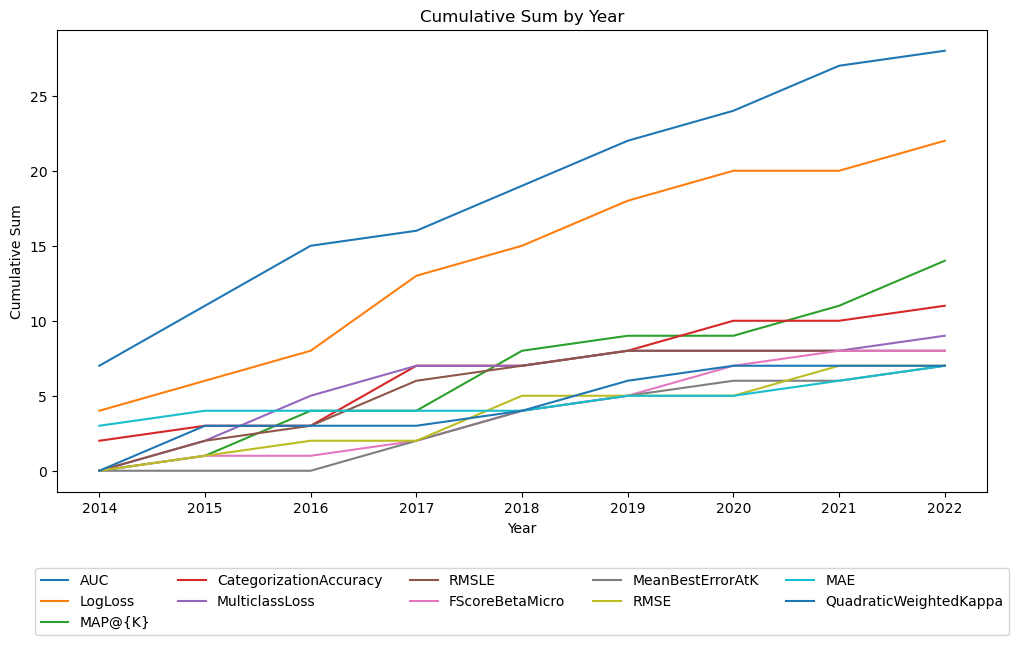

In [6]:
cumulative_sum = pivot_table.iloc[0:11,:-1].cumsum(axis=1)

ax = cumulative_sum.T.plot(figsize=(12,6), title='Cumulative Sum by Year')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
ax.set_xlabel('Year')
ax.set_ylabel('Cumulative Sum')
plt.show()

# 3. References

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>3.1 References</b></p>
</div>

* Banachewicz, Konrad; Massaron, Luca. [The Kaggle Book](https://www.kaggle.com/general/320574): Data analysis and machine learning for competitive data science. Packt Publishing